# MATH5472 Course Project2
ZIFA: Dimensionality reduction for zero-infated single-cell gene expression analysis.
https://genomebiology.biomedcentral.com/articles/10.1186/s13059-015-0805-z

## EM for ZIFA

### Algorithm

ZIFA assumes a generative model. Let $N$ be the sample size, $D$ be the number of genes. The data is generated from a projection of low-dimensional ($K\ll D$) latent variable:
\begin{align*}
\mathbf{z}_i &\sim \mathcal{N}(\mathbf{0}, \mathbf{I}),\\
\mathbf{x}_i|\mathbf{z}_i &\sim \mathcal{N}(\mathbf{A}\mathbf{z}_i+\mathbf{\mu}, \mathbf{W}),\\
h_{ij}|x_{ij} &\sim \mathrm{Bernoulli}(\exp(-\lambda x^2_{ij})),\\
y_{ij} &= x_{ij}, \mathrm{if} h_{ij}=0; \\
y_{ij} &= 0, \mathrm{if} h_{ij}=1,
\end{align*}
where $\mathbf{W} = \mathrm{diag}(\sigma_1^2, \cdots, \sigma_D^2)$.

Let $\mathbf{y}_{i+}$ denote the non-zero elements of $\mathbf{y}_i$, $\mathbf{y}_{i0}$ denote the zero elements of $\mathbf{y}_i$ (similarly for $\mathbf{x}_i$), we treat $\mathbf{z}_i$ and $\mathbf{x}_{i0}$ as latent variables, because $\mathbf{x}_{i+}$ is observed from $\mathbf{y}_{i+}$.

The complete data likelihood is given by
\begin{align*}
& p(\mathbf{Z},\mathbf{X},\mathbf{H},\mathbf{Y}|\boldsymbol{\Theta})=\prod_{i=1}^N\left[p(\mathbf{z}_i)\prod_{j=1}^Dp(x_{ij}|\mathbf{z}_i)p(h_{ij}|x_{ij})p(y_{ij}|x_{ij}, h_{ij})\right]\\
\propto & -\frac{1}{2}\sum_{i=1}^N \mathbf{z}_i^T\mathbf{z}_i \\
& + \sum_{i=1}^N\left[\sum_{j:y_{ij}=0}\left(-\frac{(x_{ij}-\tilde{x}_{ij})}{2\sigma_j^2} -\log\sigma_j-\lambda x_{ij}^2\right)\right] \\
& + \sum_{i=1}^N\left[\sum_{j:y_{ij}\neq 0}\left(-\frac{(y_{ij}-\tilde{x}_{ij})}{2\sigma_j^2} -\log\sigma_j+\log(1-\exp(-\lambda y_{ij}^2))\right)\right].
\end{align*}

For the E-step, the posterior distribution is 
\begin{align*}
p(\mathbf{z}_i, \mathbf{x}_{i0}|\mathbf{y}_i) & = p(\mathbf{z}_i, \mathbf{x}_{i0}|\mathbf{y}_{i0}, \mathbf{y}_{i+}) \\
& \propto p(\mathbf{z}_i, \mathbf{x}_{i0}, \mathbf{y}_{i0}, \mathbf{y}_{i+})\\
& = p(\mathbf{z}_i, \mathbf{x}_{i0}| \mathbf{y}_{i+}) p(\mathbf{y}_{i0}| \mathbf{x}_{i0}).
\end{align*}
The second term is $p(\mathbf{y}_{i0}| \mathbf{x}_{i0}) = \exp(-\lambda \mathbf{x}_{i0}^2)$. The first term $p(\mathbf{z}_i, \mathbf{x}_{i0}| \mathbf{y}_{i+}) = p(\mathbf{z}_i, \mathbf{x}_{i0}| \mathbf{x}_{i+})$ is a conditional distribution of partitioned Gaussian. The prior is
$$p(\mathbf{z}_i, \mathbf{x}_i) = \mathcal{N}(\mathbf{\mu}^{(p)}, \mathbf{\Sigma}^{(p)}),$$
where
$$\mathbf{\mu}^{(p)} = \begin{pmatrix}\mathbf{0}\\ \mathbf{\mu}\end{pmatrix}, \mathbf{\Sigma}^{(p)} = \begin{pmatrix}\mathbf{I} & \mathbf{A}^T\\ \mathbf{A} & \mathbf{A}\mathbf{A}^T + \mathbf{W}\end{pmatrix}.$$
Then the conditional distribution is 
$$p(\mathbf{z}_i, \mathbf{x}_{i0}| \mathbf{y}_{i+}) = \mathcal{N}(\mathbf{\mu}_c, \mathbf{\Sigma}_c),$$
where
\begin{align*}
\mathbf{\mu}_c = & \mathbf{\mu}_0^{(p)} + \mathbf{\Sigma}^{(p)}_{0+}(\mathbf{\Sigma}^{(p)}_{++})^{-1}(\mathbf{y}_{i+}-\mathbf{\mu}_+^{(p)}), \\
\mathbf{\Sigma}_c = & \mathbf{\Sigma}_{00}^{(p)} - \mathbf{\Sigma}^{(p)}_{0+}(\mathbf{\Sigma}^{(p)}_{++})^{-1}\mathbf{\Sigma}^{(p)}_{+0}.
\end{align*}
The $0, +$ indices of $\mathbf{\mu}^{(p)}$ and $\mathbf{\Sigma}^{(p)}$ are chosen similar to $\mathbf{y}_i$. Thus,
$$p(\mathbf{z}_i, \mathbf{x}_{i0}| \mathbf{y}_i) = \mathcal{N}((\mathbf{\Sigma}_c^{-1} + 2\lambda\mathbf{I}_x)^{-1}\mathbf{\Sigma}_c^{-1}\mathbf{\mu}_c, (\mathbf{\Sigma}_c^{-1} + 2\lambda\mathbf{I}_x)^{-1}),$$
where $\mathbf{I}_x$ is diagonal with ones corresponding to zeros entries of $\mathbf{y}_i$.

For the M-step, setting the derivative of Q function w.r.t. $\mu_j$ and $a_{jk}$ to zero, we get
\begin{align*}
\mu_j  = \frac{1}{N}\left[\sum_{i:y_{ij}=0}\left(\mathbb{E}[x_{ij}]-\sum_{k=1}^Ka_{jk}\mathbb{E}[z_{ik}]\right) + \sum_{i:y_{ij}\neq 0}\left(y_{ij}-\sum_{k=1}^Ka_{jk}\mathbb{E}[z_{ik}]\right)\right],
\end{align*}
\begin{align*}
a_{jk} = \frac{1}{\sum_{i=1}^N\mathbb{E}[z_{ik}^2]}\left[\sum_{i:y_{ij}=0}\left(\mathbb{E}[x_{ij}z_{ik}]- \mu_j\mathbb{E}[z_{ik}] - \sum_{k\neq k'}a_{jk'}\mathbb{E}[z_{ik}z_{ik'}]\right) + \sum_{i:y_{ij}\neq 0}\left(\mathbb{E}[y_{ij}z_{ik}]- \mu_j\mathbb{E}[z_{ik}] - \sum_{k\neq k'}a_{jk'}\mathbb{E}[z_{ik}z_{ik'}]\right)\right].
\end{align*}
Then, $\mu_j$ and $a_{j1}, \cdots, a_{jK}$ form a $K+1$-dim linear equations system, and can be solved jointly. Let $m_{ij}=\sum_{k=1}^Ka_{jk}z_{ik}+\mu_j$, the optimization for $\sigma_j$ is
$$\sigma^2_j=\frac{1}{N}\left(\sum_{i:y_{ij}=0}\left(\mathbb{E}[x^2_{ij}] - 2\mathbb{E}[x_{ij}m_{ij}] + \mathbb{E}[m^2_{ij}]\right) + \sum_{i:y_{ij}\neq 0}\left(y^2_{ij} - 2y_{ij}\mathbb{E}[m_{ij}] + \mathbb{E}[m^2_{ij}]\right)\right),$$
and $\lambda$ can be optimized via gradient methods.

### Code

In [1]:
import numpy as np
from scipy.optimize import curve_fit, minimize
import warnings
warnings.simplefilter("ignore")
np.random.seed(123)

In [2]:
def exp_decay(x, decay_coef):
    return np.exp(- decay_coef * (x**2))

In [3]:
def objective_decay_coef(x, Y, EX2):
    zero_index = (Y == 0)
    y_squared = Y ** 2
    exp_Y_squared = np.exp(-x * y_squared)
    log_exp_Y = np.nan_to_num(np.log(1 - exp_Y_squared))
    exp_ratio = np.nan_to_num(exp_Y_squared / (1 - exp_Y_squared))
    obj = sum(sum(zero_index * (-EX2 * x) + (1 - zero_index) * log_exp_Y))
    grad = sum(sum(zero_index * (-EX2) + (1 - zero_index) * y_squared * exp_ratio))
    obj = -np.array([obj])
    grad = -np.array([grad])
    return obj, grad

In [4]:
class ZIFA_model:
    def __init__(self, K):
        self.num_iter = 100
        self.K = K # size of latent variable z
        
    def init_param(self, Y):
        # initialize mu, A, Sigma
        mu = np.mean(Y, axis=0).reshape(self.D, -1) # (D, 1)
        Y0 = Y - mu.T # (N, D)
        U, S, VT = np.linalg.svd(Y0, full_matrices=True)
        A = (VT.T[:, :self.K] * S[:self.K].reshape(-1, self.K)) / np.sqrt(self.N) # (D, K)
        Z = U[:, :self.K] * np.sqrt(self.N) # (N, K)
        Sigma = np.std(Y0 - Z @ A.T, axis=0).reshape(-1, 1)
        
        # fit lambda
        means = []
        ps = []
        for j in range(self.D):
            non_zero_idx = (Y[:, j] > 0)
            means.append(np.mean(Y[non_zero_idx, j]))
            ps.append(1 - np.mean(non_zero_idx))
        decay_coef, _ = curve_fit(exp_decay, means, ps, p0=.05)
        decay_coef = decay_coef[0]
        
        self.A, self.mu, self.Sigma, self.decay_coef =  A, mu, Sigma, decay_coef
    
    def Estep(self):
        EX = np.zeros([self.N, self.D])
        EXZ = np.zeros([self.N, self.D, self.K])
        EX2 = np.zeros([self.N, self.D])
        EZ = np.zeros([self.N, self.K])
        EZZT = np.zeros([self.N, self.K, self.K])
        for i in range(self.N):
            Y_i = Y[i, :]
            zero_index = (Y_i == 0)
            
            # compute p(z_i, x_i0 | y_i+)
            mu_hat = np.zeros([self.K + self.D, 1])
            mu_hat[self.K:(self.K + self.D), :] += self.mu
            A_hat = np.zeros([self.K + self.D, self.K])
            A_hat[:self.K, :] += np.eye(self.K)
            A_hat[self.K:, :] += self.A
            Y_positive = Y_i[~zero_index].reshape(-1, 1)
            zero_index_hat = np.array([True for _ in range(self.K)] + list(zero_index))
            A_hat_0 = A_hat[zero_index_hat, :]
            A_hat_p = A_hat[~zero_index_hat, :]
            S_00 = A_hat_0 @ A_hat_0.T
            S_00[self.K:, self.K:] += np.diag(self.Sigma[zero_index, 0]**2)
            Sigma_hat = np.array([0 for _ in range(self.K)] + list(self.Sigma[zero_index, 0]**2))
            A_p = self.A[~zero_index, :]
            Sigma2_p_inv = (1 / self.Sigma[~zero_index, 0]**2).reshape(-1, 1)
            # apply Woodburry identity
            S_pp_inv = np.diag(Sigma2_p_inv[:, 0]) - (Sigma2_p_inv @ Sigma2_p_inv.T) \
                       * (A_p @ np.linalg.inv(np.eye(self.K) + A_p.T @ (Sigma2_p_inv * A_p)) @ A_p.T)
            mu_c = mu_hat[zero_index_hat, :] \
                   + A_hat_0 @ A_hat_p.T @ S_pp_inv @ (Y_positive - self.mu[~zero_index])
            S_c = S_00 - A_hat_0 @ A_hat_p.T @ S_pp_inv @ A_hat_p @ A_hat_0.T
            # compute p(z_i, x_i0 | y_i+, y_0)
            S_c_inv = np.linalg.inv(S_c)
            I_x = np.zeros([np.sum(zero_index_hat), np.sum(zero_index_hat)])
            I_x[self.K:, self.K:] += np.eye(np.sum(zero_index_hat) - self.K)
            S_xz = np.linalg.inv(S_c_inv + 2 * self.decay_coef * I_x)
            mu_xz = S_xz @ S_c_inv @ mu_c
            
            # compute expectation
            EZ[i, :] = mu_xz[:self.K, 0]
            EX[i, zero_index] = mu_xz[self.K:, 0]
            EX2[i, zero_index] = mu_xz[self.K:, 0] ** 2 + np.diag(S_xz[self.K:, self.K:])
            EZZT[i, :, :] = mu_xz[:self.K] @ mu_xz[:self.K].T + S_xz[:self.K, :self.K]
            EXZ[i, zero_index, :] = mu_xz[self.K:] @ mu_xz[:self.K].T + S_xz[self.K:, :self.K]
            
        self.EZ, self.EZZT, self.EX, self.EXZ, self.EX2 = EZ, EZZT, EX, EXZ, EX2
    
    def Mstep(self):
        A = np.zeros([self.D, self.K])
        mu = np.zeros([self.D, 1])
        Sigma = np.zeros([self.D, 1])
        zero_index = (Y == 0)

        B = np.zeros([self.K + 1, self.K + 1])
        for i in range(self.K):
            for j in range(self.K):
                B[i, j] = np.sum(self.EZZT[:, i, j])
        B[self.K, :self.K] = np.sum(self.EZ, axis=0)
        B[:self.K, self.K] = np.sum(self.EZ, axis=0)
        B[self.K, self.K] = self.N

        tiled_EZ = np.tile(self.EZ.reshape(self.N, 1, self.K), [1, self.D, 1])
        tiled_Y = np.tile(Y.reshape(self.N, self.D, 1), [1, 1, self.K])
        tiled_zero_index = np.tile(zero_index.reshape(self.N, self.D, 1), [1, 1, self.K])

        c = np.zeros([self.K + 1, self.D])
        c[self.K, :] += np.sum(zero_index * self.EX + (1 - zero_index) * Y, axis=0)
        c[:self.K, :] = np.sum(tiled_zero_index * self.EXZ \
                               + (1 - tiled_zero_index) * tiled_Y * tiled_EZ, axis=0).T

        solution = np.linalg.inv(B) @ c
        A = solution[:self.K, :].T
        mu = solution[[self.K], :].T

        EXM = np.zeros([self.N, self.D])
        EM = np.zeros([self.N, self.D])
        EM2 = np.zeros([self.N, self.D])

        tiled_mu = np.tile(mu.T, [self.N, 1])
        tiled_A = np.tile(A.reshape(1, self.D, self.K), [self.N, 1, 1])

        EXM = np.sum(tiled_A * self.EXZ, axis=2) + tiled_mu * self.EX
        test_sum = np.sum(tiled_A * tiled_EZ, axis=2)
        A_product = np.tile(A.reshape(1, self.D, self.K), [self.K, 1, 1]) \
                    * (np.tile(A.reshape(1, self.D, self.K), [self.K, 1, 1]).T)

        for i in range(self.N):
            EM[i, :] = (A @ self.EZ[i, :].T + mu.T)
            EZZT_tiled = np.tile(self.EZZT[i, :, :].reshape(self.K, 1, self.K), [1, self.D, 1])
            ezzt_sum = np.sum(EZZT_tiled * A_product, axis=(0, 2))
            EM2[i, :] = ezzt_sum + 2 * test_sum[i, :] * tiled_mu[i, :] + tiled_mu[i, :]**2

        Sigma = np.sum(zero_index * (self.EX2 - 2 * EXM + EM2) \
                       + (1 - zero_index) * (Y ** 2 - 2 * Y * EM + EM2), axis=0)
        Sigma = np.sqrt(Sigma / self.N).reshape(-1, 1)
        
        # optimize lambda
        decay_coef = minimize(lambda x: objective_decay_coef(x, Y, self.EX2),
                              self.decay_coef, jac=True, bounds=[[1e-8, np.inf]])
        decay_coef = decay_coef.x[0]
        
        # check convergence
        self.convergence = True
        for new, old in [[A, self.A], [mu, self.mu], [Sigma, self.Sigma], [decay_coef, self.decay_coef]]:
            rel_param_change = np.mean(np.abs(new - old)) / np.mean(np.abs(new))
            if rel_param_change > 1e-2:
                self.convergence = False
                break
        
        self.A, self.mu, self.Sigma, self.decay_coef = A, mu, Sigma, decay_coef
        
    def fit(self, Y):
        self.N, self.D = Y.shape
        self.init_param(Y)
        for k in range(self.num_iter):
            print('Running the %d-th iteration...' % (k + 1))
            self.Estep()
            self.Mstep()
            if self.convergence:
                print('Parameters convergence after the %d-th iteration.' % (k + 1))
                break

## Simulation study
The data is generated according to the ZIFA model.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

N = 150
K = 10
D = 50
sigma2 = 0.3
lam = 0.1
Z = np.random.normal(0, 1, [N, K])
A = np.random.uniform(-0.5, 0.5, [K, D])
mu = np.random.uniform(2.7, 3.3, [1, D])
W = np.diag(np.random.uniform(0.9, 1.1, [D]) * sigma2)
eps = np.random.multivariate_normal(np.zeros(D), W, N)
X = Z @ A + mu + eps
P = exp_decay(X, lam)
H = np.random.binomial(1, P)
Y = X * (1 - H)

model_simu = ZIFA_model(K)
model_simu.fit(Y)

Running the 1-th iteration...
Running the 2-th iteration...
Running the 3-th iteration...
Running the 4-th iteration...
Running the 5-th iteration...
Running the 6-th iteration...
Running the 7-th iteration...
Running the 8-th iteration...
Running the 9-th iteration...
Running the 10-th iteration...
Running the 11-th iteration...
Running the 12-th iteration...
Running the 13-th iteration...
Running the 14-th iteration...
Running the 15-th iteration...
Running the 16-th iteration...
Running the 17-th iteration...
Running the 18-th iteration...
Running the 19-th iteration...
Running the 20-th iteration...
Parameters convergence after the 20-th iteration.


We compare the imputed missing values with real values. The green line is $f(x) = x$.

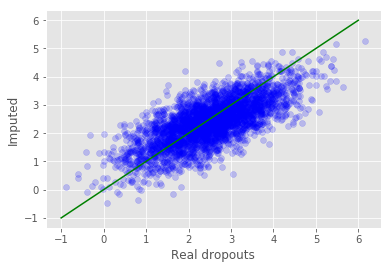

Estimated lambda = 0.10014
Error of mu = 0.12658 (take average over entries)
Error of sigma^2 = 0.00512 (take average over entries)


In [6]:
zero_index = (Y == 0)

plt.figure()
plt.style.use('ggplot')
plt.scatter(X[zero_index].reshape(-1,), 
            model_simu.EX[zero_index].reshape(-1,), 
            c='b', alpha=0.2)
plt.plot(np.linspace(-1, 6, 2), np.linspace(-1, 6, 2), '-', c='green')
plt.xlabel("Real dropouts")
plt.ylabel("Imputed")
plt.show()
print('Estimated lambda = %.5f' % model_simu.decay_coef)
print('Error of mu = %.5f (take average over entries)' % np.mean((model_simu.mu - mu)**2))
print('Error of sigma^2 = %.5f (take average over entries)'
      % np.mean((model_simu.Sigma**2 - np.diagonal(W))**2))

## K-means for CORTEX data

In [7]:
# import CORTEX data
import pandas as pd
Y = pd.read_table('CORTEX data/gene_expression.txt',header=None, sep=' ')
label = pd.read_table('CORTEX data/labels.txt',header=None, sep=' ')

In [8]:
Y

,0,1,2,3,4,5,6,7,8,9,...,548,549,550,551,552,553,554,555,556,557
0,6.712956,0.000000,0.0,0.000000,0.000000,5.153292,2.944439,4.804021,0.000000,0.000000,...,0.000000,2.079442,1.945910,0.000000,2.397895,0.693147,2.302585,2.079442,2.397895,1.945910
1,6.768493,0.000000,0.0,0.000000,0.000000,0.000000,3.367296,4.234107,0.000000,0.000000,...,0.000000,1.098612,0.693147,1.098612,1.386294,1.386294,0.000000,2.302585,0.000000,2.484907
2,7.121252,0.693147,0.0,0.000000,0.000000,4.795791,4.990433,4.770685,0.000000,0.000000,...,0.000000,2.302585,2.397895,1.791759,2.995732,1.098612,3.401197,2.397895,1.791759,2.944439
3,7.133296,0.000000,0.0,0.000000,0.000000,0.000000,3.871201,4.736198,0.000000,0.000000,...,0.000000,2.397895,0.000000,2.484907,3.135494,0.693147,1.098612,2.833213,1.098612,3.367296
4,5.605802,0.693147,0.0,0.000000,0.000000,0.000000,1.791759,4.465908,0.000000,0.000000,...,0.000000,2.079442,1.098612,2.079442,1.945910,0.693147,2.772589,1.945910,2.484907,1.791759
5,6.448889,0.000000,0.0,0.000000,0.000000,0.000000,4.418841,4.158883,0.000000,0.000000,...,0.000000,1.386294,0.000000,1.609438,2.833213,0.693147,1.945910,2.639057,0.693147,3.091042
6,6.894670,1.098612,0.0,0.000000,0.000000,2.772589,4.204693,4.653960,0.000000,0.000000,...,0.000000,2.079442,0.693147,2.890372,2.197225,1.098612,2.079442,2.564949,1.609438,2.484907
7,5.342334,0.000000,0.0,0.000000,0.000000,0.000000,4.248495,4.290459,0.000000,0.000000,...,0.000000,2.484907,0.000000,0.693147,2.484907,2.397895,1.791759,2.708050,1.098612,2.302585
8,5.986452,0.000000,0.0,0.000000,0.000000,0.000000,3.178054,4.454347,0.000000,0.000000,...,0.000000,2.484907,2.484907,2.197225,1.791759,0.000000,2.079442,1.791759,1.386294,3.091042
9,6.082219,0.000000,0.0,0.000000,0.000000,0.000000,3.737670,4.700480,0.000000,0.000000,...,0.000000,1.386294,1.098612,2.302585,2.302585,0.000000,2.397895,2.197225,2.197225,3.044522


In [9]:
Y = Y.values
label = label.values

model_real = ZIFA_model(10)
model_real.fit(Y)

Running the 1-th iteration...
Running the 2-th iteration...
Running the 3-th iteration...
Running the 4-th iteration...
Running the 5-th iteration...
Running the 6-th iteration...
Parameters convergence after the 6-th iteration.


We use the Adjusted Rand Index (ARI) to evaluate the clustering performance (higher is better). When ARI is close to 0, the clusterings are almost randomly labeled. When ARI is 1, the clusterings are identical up to a permutation.

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.manifold import TSNE

kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(model_real.EZ)

label_pred = kmeans.labels_

ari_zifa = adjusted_rand_score(label.reshape(-1, ), label_pred)

print('ARI score for ZIFA: %.3f' % ari_zifa)

ARI score for ZIFA: 0.779


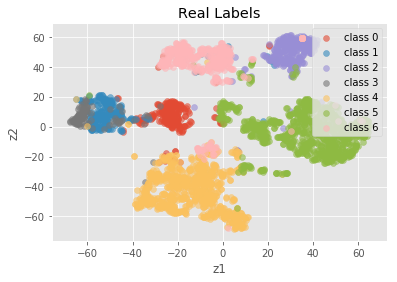

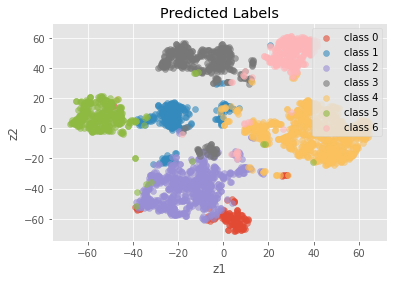

In [11]:
# visualize 2D tSNE map of EZ
def tSNE(data, dim):
    X = data[:, :-1]
    tsne = TSNE(n_components=dim)
    X_tSNE = tsne.fit_transform(X)
    return X_tSNE

EZ_tSNE = tSNE(model_real.EZ, 2)

fig = plt.figure()
ax = plt.subplot()
for i in range(7):
    ax.scatter(EZ_tSNE[np.where(label == i), 0], EZ_tSNE[np.where(label == i), 1], label='class %d' % i, alpha=0.6)
plt.legend(loc='upper right')
plt.title('Real Labels')
plt.xlabel('z1')
plt.ylabel('z2')
plt.show()

fig = plt.figure()
ax = plt.subplot()
for i in range(7):
    ax.scatter(EZ_tSNE[np.where(label_pred == i), 0], EZ_tSNE[np.where(label_pred == i), 1], label='class %d' % i, alpha=0.6)
plt.legend(loc='upper right')
plt.title('Predicted Labels')
plt.xlabel('z1')
plt.ylabel('z2')
plt.show()

## Amortized Variational Inference for ZIFA

We treat $\mathbf{x}_i$ and $\mathbf{z}_i$ as random variables, and assume factorizable posterior 
$$q_{\phi}(\mathbf{z}_i, \mathbf{x}_i|\mathbf{y}_i)=q_{\phi}(\mathbf{x}_i|\mathbf{y}_i)q_{\phi}(\mathbf{z}_i|\mathbf{y}_i) = \mathcal{N}(\mathbf{\mu}_{\mathbf{x}i}, \mathbf{\sigma}_{\mathbf{x}i})\mathcal{N}(\mathbf{\mu}_{\mathbf{z}i}, \mathbf{\sigma}_{\mathbf{z}i}).$$
Then the evidence lower bound (ELBO) is 
\begin{align*}
\mathcal{L} = \sum_{i=1}^N\left(\mathbb{E}_{q_{\phi}(\mathbf{z}_i, \mathbf{x}_i|\mathbf{y}_i)}\left[\log p(\mathbf{x}_i,\mathbf{y}_i,\mathbf{z}_i)\right] - \mathbb{E}_{q_{\phi}(\mathbf{x}_i|\mathbf{y}_i)}\left[\log q_{\phi}(\mathbf{x}_i|\mathbf{y}_i)\right] - \mathbb{E}_{q_{\phi}(\mathbf{z}_i|\mathbf{y}_i)}\left[\log q_{\phi}(\mathbf{z}_i|\mathbf{y}_i)\right]\right).
\end{align*}
$p(\mathbf{x}_i,\mathbf{y}_i,\mathbf{z}_i)$ is the complete data likelihood in the first section, and
$$\mathbb{E}_{q_{\phi}(\mathbf{z}_i|\mathbf{y}_i)}\left[\log q_{\phi}(\mathbf{z}_i|\mathbf{y}_i)\right]=\sum_{j=1}^D\left(\log\sigma_{\mathbf{z}ij}+\frac12(1+\log(2\pi))\right),$$
$$\mathbb{E}_{q_{\phi}(\mathbf{x}_i|\mathbf{y}_i)}\left[\log q_{\phi}(\mathbf{x}_i|\mathbf{y}_i)\right]=\sum_{j:y_{ij}\neq 0}\left(\log\sigma_{\mathbf{x}ij}+\frac12(1+\log(2\pi))\right).$$
The constant terms can be omitted. We optimize the negative ELBO.

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
torch.manual_seed(123)

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
N = 3005
D = 558
K = 10

In [15]:
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.linear = nn.Linear(K, D)
        self.Sigma_logit = nn.Parameter(torch.Tensor(D).fill_(0))
        self.lam_logit = nn.Parameter(torch.Tensor(1).fill_(0))
        
    def forward(self, z):
        x_tilde = self.linear(z)
        Sigma = torch.exp(self.Sigma_logit)
        lam = torch.exp(self.lam_logit)
        
        return x_tilde, Sigma, lam

In [16]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.linear1 = nn.Sequential(
            nn.Linear(D, 1024),
            nn.ReLU(),
        )
        self.linear2 = nn.Sequential(
            nn.Linear(1024, 1024),
            nn.ReLU(),
        )
        self.fc_z_mu = nn.Linear(1024, K)
        self.fc_z_sigma = nn.Linear(1024, K)
        self.fc_x_mu = nn.Linear(1024, D)
        self.fc_x_sigma = nn.Linear(1024, D)
        
    def forward(self, y):
        h = self.linear1(y)
        h = self.linear2(h)
        z_mu = self.fc_z_mu(h)
        z_sigma = torch.exp(self.fc_z_sigma(h))
        z_eps = torch.randn(N, K).to(device)
        z = z_mu + z_sigma * z_eps
        x_mu = self.fc_x_mu(h)
        x_sigma = torch.exp(self.fc_x_sigma(h))
        x_eps = torch.randn(N, D).to(device)
        x = x_mu + x_sigma * x_eps
        
        return z, z_mu, z_sigma, x, x_mu, x_sigma

In [17]:
E_net = Encoder().to(device)
D_net = Decoder().to(device)

In [18]:
# Set optimizer
parameters = list(E_net.parameters()) + list(D_net.parameters())
optimizer = Adam(parameters, lr=1e-3)
ELBO = []
zero_index = torch.from_numpy((Y == 0) * 1.).type(torch.FloatTensor).to(device)
Y_data = torch.from_numpy(Y).type(torch.FloatTensor).to(device)

In [19]:
def train(step):
    E_net.train()
    D_net.train()
    
    Z, Z_mu, Z_sigma, X, X_mu, X_sigma = E_net(Y_data)
    X_tilde, Sigma, lam = D_net(Z)

    E_net.zero_grad()
    D_net.zero_grad()

    loss = N * torch.sum(torch.log(Sigma)) \
    + torch.sum(
        0.5 * torch.sum(Z**2, 1) \
        + torch.sum(zero_index * ((X - X_tilde)**2 / (2 * Sigma**2) + lam * X**2), 1) \
        + torch.sum((1 - zero_index) * ((Y_data - X_tilde)**2 / (2 * Sigma**2) \
                                        - torch.log(1 - torch.exp(- lam * Y_data**2) + 1e-6)), 1) \
    ) \
    - torch.sum(zero_index * torch.log(X_sigma + 1e-6)) - torch.sum(torch.log(Z_sigma + 1e-6))
    loss /= N
    loss.backward() # Compute gradients
    optimizer.step() # Optimization
    ELBO.append(-loss)
    if not step % 200:
        print('Step %d, ELBO=%.3f' % (step, -loss.cpu().data.numpy()))

In [20]:
for step in range(5001):
    train(step)

Step 0, ELBO=-1505.750
Step 200, ELBO=-454.892
Step 400, ELBO=-377.354
Step 600, ELBO=-331.493
Step 800, ELBO=-293.119
Step 1000, ELBO=-265.240
Step 1200, ELBO=-240.484
Step 1400, ELBO=-224.105
Step 1600, ELBO=-210.623
Step 1800, ELBO=-201.167
Step 2000, ELBO=-194.588
Step 2200, ELBO=-190.194
Step 2400, ELBO=-187.038
Step 2600, ELBO=-185.259
Step 2800, ELBO=-183.434
Step 3000, ELBO=-182.190
Step 3200, ELBO=-183.196
Step 3400, ELBO=-181.763
Step 3600, ELBO=-181.941
Step 3800, ELBO=-181.415
Step 4000, ELBO=-180.529
Step 4200, ELBO=-180.252
Step 4400, ELBO=-181.277
Step 4600, ELBO=-180.894
Step 4800, ELBO=-180.855
Step 5000, ELBO=-179.435


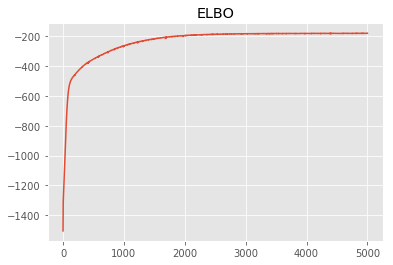

In [21]:
plt.figure()
plt.plot(np.arange(len(ELBO)), ELBO)
plt.title("ELBO")
plt.show()

In [22]:
Z, Z_mu, Z_sigma, X, X_mu, X_sigma = E_net(Y_data)

Z_hat = Z_mu.cpu().data.numpy()

kmeans_vae = KMeans(n_clusters=7, random_state=0)
kmeans_vae.fit(Z_hat)

label_pred_vae = kmeans_vae.labels_

ari_zifa_vae = adjusted_rand_score(label.reshape(-1, ), label_pred_vae)

print('ARI score for ZIFA_VAE: %.3f' % ari_zifa_vae)

ARI score for ZIFA_VAE: 0.748


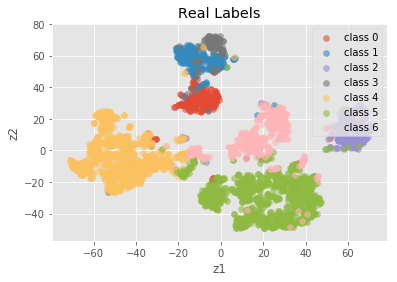

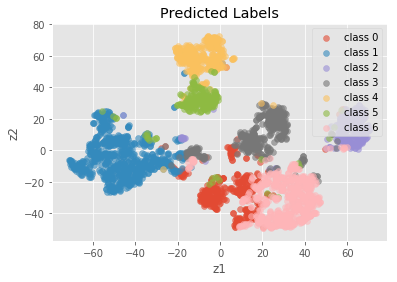

In [23]:
# visualize 2D tSNE map of Z_mu

Z_hat_tSNE = tSNE(Z_hat, 2)

fig = plt.figure()
ax = plt.subplot()
for i in range(7):
    ax.scatter(Z_hat_tSNE[np.where(label == i), 0], Z_hat_tSNE[np.where(label == i), 1], label='class %d' % i, alpha=0.6)
plt.legend(loc='upper right')
plt.title('Real Labels')
plt.xlabel('z1')
plt.ylabel('z2')
plt.show()

fig = plt.figure()
ax = plt.subplot()
for i in range(7):
    ax.scatter(Z_hat_tSNE[np.where(label_pred_vae == i), 0], Z_hat_tSNE[np.where(label_pred_vae == i), 1], label='class %d' % i, alpha=0.6)
plt.legend(loc='upper right')
plt.title('Predicted Labels')
plt.xlabel('z1')
plt.ylabel('z2')
plt.show()

## Conclusion

For this dataset, when we set the dimension of latent space $K=10$, we find that the EM algorithm has a better performance than amortized variational inference, in terms of the ARI scores. This result is reasonable, because in the model using amortized variational inference, the posterior of $\mathbf{x}_i$ and $\mathbf{z}_i$ are assumed to be conditionally independent given $\mathbf{y}_i$, then the posterior may ignore the correlation of $\mathbf{x}_i$ and $\mathbf{z}_i$. However, it is still compatible.